In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

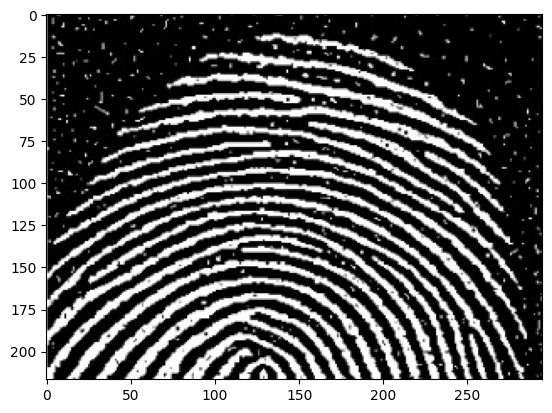

In [7]:
img = plt.imread("finger.jpeg")
plt.imshow(img, cmap='gray')
plt.show()

In [8]:
def erosion(image, mask):
    considered_pixel = mask.copy()
    new_image = image.copy()
    x, y = mask.shape
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            ok = True
            for l in range(x):
                for r in range(y):
                    if(mask[l, r] == 0):
                        continue
                    xx = l + i - (x // 2)
                    yy = r + j - (y // 2)
                    considered_pixel[l, r] = 0
                    if(xx >= 0 and xx < height and yy >=0 and yy < width):
                        considered_pixel[l, r] = image[xx, yy]
                    
                    if(considered_pixel[l, r] == 0):
                        ok = False
                        break
            if ok :
                new_image[i,j] = 255
            else:
                new_image[i,j] = 0
    
    return new_image.astype(np.uint8)

In [9]:
def dilation(image, mask):
    considerd_pixel = mask.copy()
    new_image = np.zeros(image.shape, dtype=np.uint8)
    x, y = mask.shape
    height, width = image.shape
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            ok = False
            for l in range(x):
                for r in range(y):
                    xx = i - x // 2 + l
                    yy = j - y // 2 + r
                    if xx < 0 or xx >= height or yy < 0 or yy >= width:
                        continue
                    if image[xx,yy] > 0 and mask[l , r] > 0:
                        ok = True
                        break
            
            if(ok):
                new_image[i,j] = 255
            ok = False

    
    return new_image

In [13]:
mask = np.ones((3,3), dtype=np.uint8)
mask[0 , 0] = mask[0 , 2] = mask[2 , 0] = mask[2, 2] = 0
binary_image = (img >= 100) * 255

ero_image = erosion(binary_image, mask)

plt.imshow(ero_image, cmap='gray')
plt.title("new_image")
plt.show()

mask = np.ones((3,3),np.uint8)
dlo_image = dilation(ero_image, mask)
plt.imshow(dlo_image, cmap='gray')
plt.title("dilation image")
plt.show()


ValueError: too many values to unpack (expected 2)

opening

In [ ]:
def opening(image , mask):
    ero_image = erosion(image, mask)
    dia_image = dilation(ero_image, mask)
    return dia_image

closing

In [ ]:
def closing(image , mask):
    dia_image = dilation(image, mask)
    ero_image = erosion(dia_image, mask)
    return ero_image

boundary extraction

In [ ]:
def boundary(image, mask):
    ero_image = erosion(image, mask)
    boundary = image - ero_image
    return boundary